# DATA UPLOADING AND HANDLING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
account = pd.read_csv("account_activity.csv")
customer = pd.read_csv("customer_data.csv")
fraud = pd.read_csv("fraud_indicators.csv")
suspision = pd.read_csv("suspicious_activity.csv")
merchant = pd.read_csv("merchant_data.csv")
tran_cat = pd.read_csv("transaction_category_labels.csv")
amount = pd.read_csv("amount_data.csv")
anamoly = pd.read_csv("anomaly_scores.csv")
tran_data = pd.read_csv("transaction_metadata.csv")
tran_rec = pd.read_csv("transaction_records.csv")

In [ ]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [ ]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [ ]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [ ]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [ ]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796,Customer 1796,33,Address 1796,5588.049942,2024-03-06,0
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946,Customer 1946,18,Address 1946,7324.785332,2024-08-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654,Customer 1654,51,Address 1654,9088.738359,2023-10-16,0
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928,Customer 1928,60,Address 1928,9352.655675,2024-07-16,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 117.3+ KB


In [ ]:
data.shape

(1000, 15)

In [ ]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [ ]:
data.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [ ]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


# DATA VISUALISATION

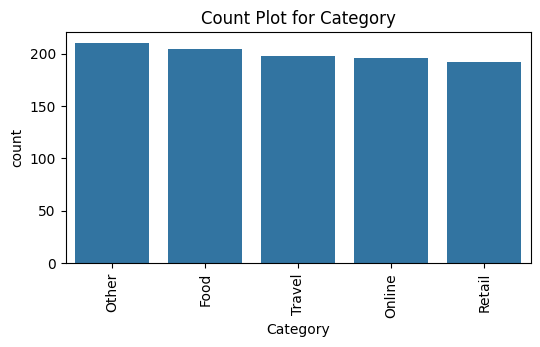

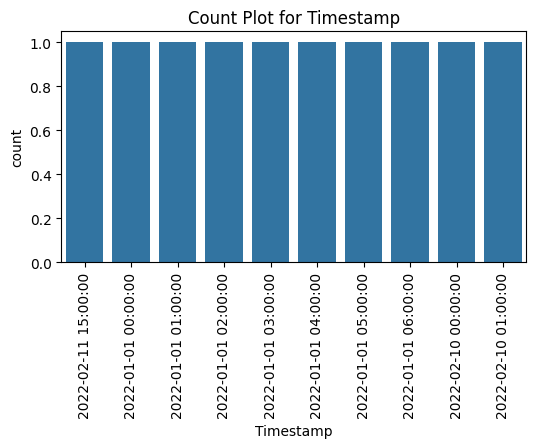

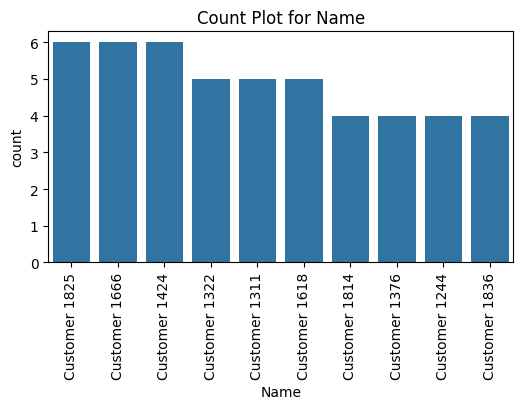

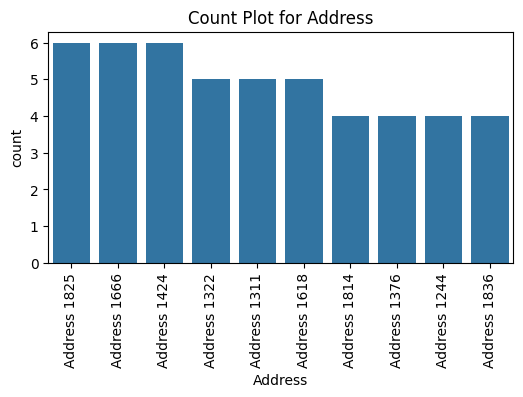

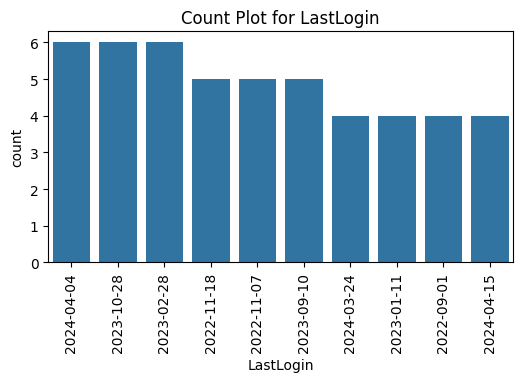

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        top_10_values = data[column].value_counts().head(10)
        plt.figure(figsize=(6, 3))
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()

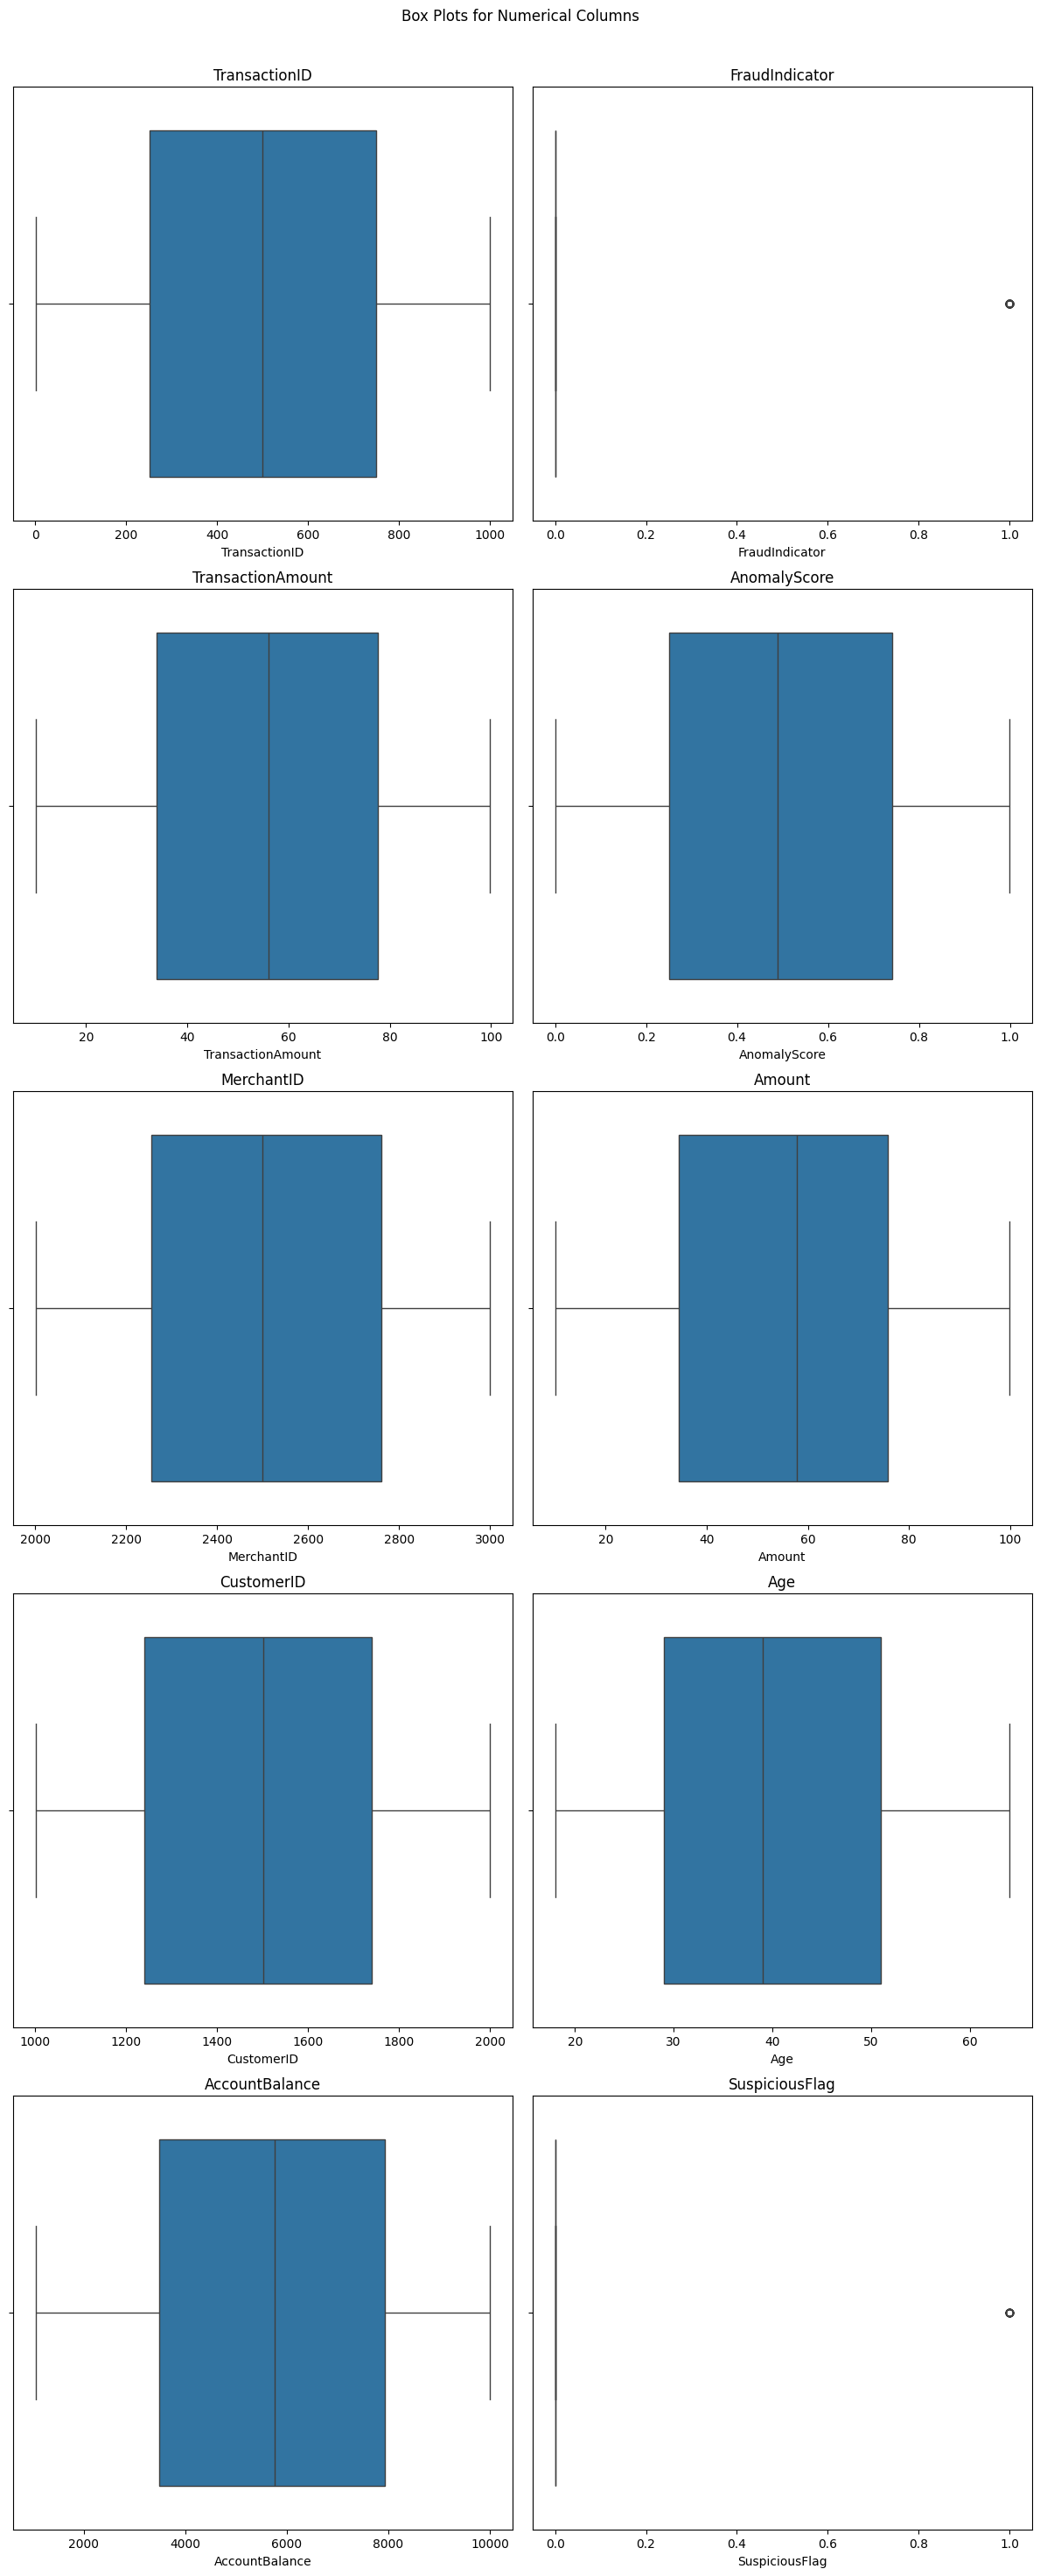

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = len(data.select_dtypes(include=['number']).columns)
num_rows = (num_cols // 2) + (num_cols % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

/tmp/ipython-input-16-2495380530.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')


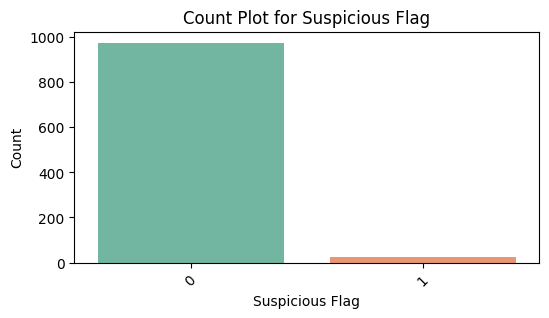

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

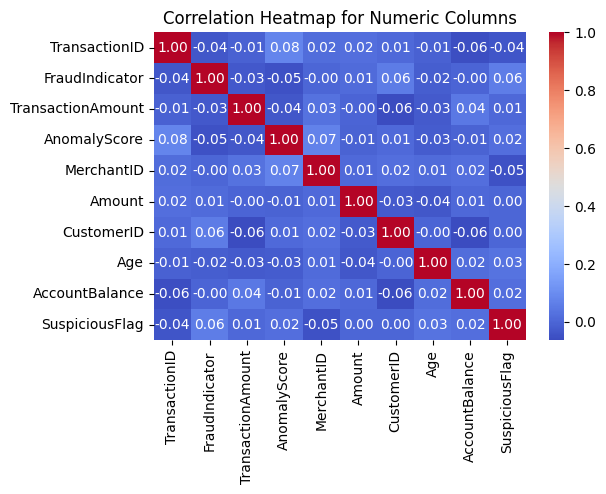

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()

# DATA PREPROCESSING

In [ ]:
columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [ ]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0


In [ ]:
print(data1['FraudIndicator'].value_counts())
print(data1['SuspiciousFlag'].value_counts())
print(data1['Category'].value_counts())

FraudIndicator
0    955
1     45
Name: count, dtype: int64
SuspiciousFlag
0    975
1     25
Name: count, dtype: int64
Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64


In [ ]:
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


In [ ]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [ ]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [ ]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [ ]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [ ]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
2,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
3,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,41.634001,5588.049942,2024-03-06,0,2022-01-01 03:00:00,3,795
4,0,Other,54.051618,0.034059,2022-01-01 04:00:00,78.122853,7324.785332,2024-08-03,0,2022-01-01 04:00:00,4,945


In [ ]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
2,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
3,4,46.121117,0.876994,41.634001,5588.049942,0,3,795
4,2,54.051618,0.034059,78.122853,7324.785332,0,4,945
...,...,...,...,...,...,...,...,...
995,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
996,3,47.958030,0.512483,96.299792,7067.831609,0,12,524
997,0,64.210046,0.367740,75.164459,9088.738359,0,13,612
998,4,64.684167,0.960364,93.633040,9352.655675,0,14,886


# LOGISTIC REGRESSION

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
X_train.shape,Y_test.shape

((800, 8), (200,))

In [ ]:
 #Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(random_state = 42)
model.fit(X_train_smote, Y_train_smote)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.605
Precision: 0.038461538461538464
Recall: 0.42857142857142855
F1 Score: 0.07058823529411765


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DECISION TREES

In [ ]:
#Decision Trees

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, Y_train_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)

Accuracy: 0.83
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


# XGBOOST

In [ ]:
from xgboost import XGBClassifier, cv, DMatrix
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
dtrain = DMatrix(X_train_smote, label=Y_train_smote)
dtest = DMatrix(X_test, label=Y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

cv_results = cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=3,
    metrics='logloss',
    early_stopping_rounds=10,
    as_pandas=True,
    seed=42
)

In [ ]:
best_boost_rounds = len(cv_results)
print(f"Best Boosting Rounds: {best_boost_rounds}")

xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=best_boost_rounds,
    random_state=42
)
xgb_model.fit(X_train_smote, Y_train_smote)
Y_pred_xgb = xgb_model.predict(X_test)
Y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


Best Boosting Rounds: 133


In [ ]:
custom_threshold = 0.4
Y_pred_custom = (Y_proba_xgb >= custom_threshold).astype(int)

accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
precision_xgb = precision_score(Y_test, Y_pred_xgb, zero_division=0)
recall_xgb = recall_score(Y_test, Y_pred_xgb, zero_division=0)
f1_xgb = f1_score(Y_test, Y_pred_xgb, zero_division=0)

print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-Score: {f1_xgb:.2f}")

Accuracy: 0.92
Precision: 0.59
Recall: 0.76
F1-Score: 0.67


# ADABOOST

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, Y = make_classification(
    n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42
)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [1, 2]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_smote, Y_train_smote)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [ ]:
best_adaboost_model = grid_search.best_estimator_
Y_pred_ada = best_adaboost_model.predict(X_test)
Y_proba_ada = best_adaboost_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [ ]:
accuracy_ada = accuracy_score(Y_test, Y_pred_ada)
precision_ada = precision_score(Y_test, Y_pred_ada, zero_division=0)
recall_ada = recall_score(Y_test, Y_pred_ada, zero_division=0)
f1_ada = f1_score(Y_test, Y_pred_ada, zero_division=0)

print(f"Accuracy: {accuracy_ada:.2f}")
print(f"Precision: {precision_ada:.2f}")
print(f"Recall: {recall_ada:.2f}")
print(f"F1-Score: {f1_ada:.2f}")

Accuracy: 0.92
Precision: 0.59
Recall: 0.81
F1-Score: 0.68


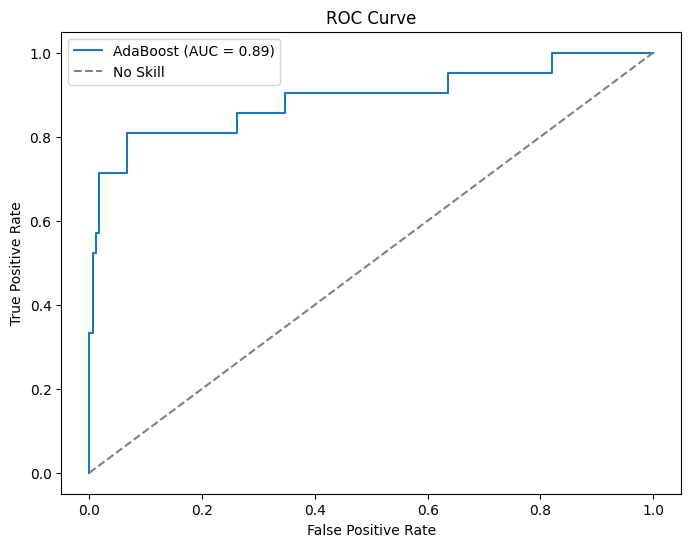

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_ada = roc_auc_score(Y_test, Y_proba_ada)
fpr, tpr, _ = roc_curve(Y_test, Y_proba_ada)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

KERAS FFNN

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Standardize inputs
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Build refined deep learning model
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_dl.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
model_dl.fit(X_train_scaled, Y_train_smote,
             epochs=50,
             batch_size=32,
             validation_split=0.1,
             callbacks=[early_stop],
             verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.5784 - loss: 0.7173 - val_accuracy: 0.6944 - val_loss: 0.6532
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7870 - loss: 0.4900 - val_accuracy: 0.8750 - val_loss: 0.5053
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8143 - loss: 0.4254 - val_accuracy: 0.8889 - val_loss: 0.3803
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8457 - loss: 0.3543 - val_accuracy: 0.8889 - val_loss: 0.3132
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8943 - loss: 0.2999 - val_accuracy: 0.8958 - val_loss: 0.2563
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9044 - loss: 0.2777 - val_accuracy: 0.8958 - val_loss: 0.2327
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8928 - loss: 0.2587 - val_accuracy: 0.8819 - val_loss: 0.2308
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9125 - loss: 0.2443 - val_accuracy: 0.9097 - v

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_dl = (model_dl.predict(X_test_scaled) > 0.5).astype(int).flatten()
y_proba_dl = model_dl.predict(X_test_scaled).flatten()

accuracy_dl = accuracy_score(Y_test, y_pred_dl)
precision_dl = precision_score(Y_test, y_pred_dl, zero_division=0)
recall_dl = recall_score(Y_test, y_pred_dl, zero_division=0)
f1_dl = f1_score(Y_test, y_pred_dl, zero_division=0)
roc_auc_dl = roc_auc_score(Y_test, y_proba_dl)

print(f"DL Accuracy: {accuracy_dl:.2f}")
print(f"DL Precision: {precision_dl:.2f}")
print(f"DL Recall: {recall_dl:.2f}")
print(f"DL F1-Score: {f1_dl:.2f}")
print(f"DL ROC-AUC: {roc_auc_dl:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
DL Accuracy: 0.92
DL Precision: 0.60
DL Recall: 0.57
DL F1-Score: 0.59
DL ROC-AUC: 0.84


In [ ]:
!pip install scikeras

In [ ]:
pip install scikeras tensorflow scikit-learn imbalanced-learn

In [ ]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, precision_recall_curve
)
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, Dropout, Flatten,
    Dense, BatchNormalization, Input
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# === Step 3: Focal Loss ===
def focal_loss(gamma=2., alpha=0.25):
    def loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        bce = tf.keras.backend.binary_crossentropy(y_true, y_pred)
        bce_exp = tf.keras.backend.exp(-bce)
        focal = alpha * tf.keras.backend.pow((1 - bce_exp), gamma) * bce
        return focal
    return loss

# === Step 4: Model ===
model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv1D(64, 3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Dropout(0.4),
    Conv1D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(2),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),
              loss=focal_loss(), metrics=['accuracy'])

# === Step 5: Class Weights ===
weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weights = {0: weights[0], 1: weights[1]}

# === Step 6: Train ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, min_lr=1e-5)

model.fit(
    X_train_cnn, Y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# === Step 7: Evaluate ===
y_proba = model.predict(X_test_cnn).flatten()

# Optimal threshold for best F1
precisions, recalls, thresholds = precision_recall_curve(Y_test, y_proba)
best_f1, best_thresh = 0, 0.5
for p, r, t in zip(precisions, recalls, thresholds):
    f1 = 2 * p * r / (p + r + 1e-6)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

y_pred = (y_proba >= best_thresh).astype(int)

print(f"\nOptimal Threshold: {best_thresh:.2f}")
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:   ", recall_score(Y_test, y_pred))
print("F1 Score: ", f1_score(Y_test, y_pred))
print("ROC AUC:  ", roc_auc_score(Y_test, y_proba))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.6354 - loss: 0.2887 - val_accuracy: 0.1375 - val_loss: 0.0528 - learning_rate: 5.0000e-04
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7412 - loss: 0.1511 - val_accuracy: 0.1250 - val_loss: 0.0776 - learning_rate: 5.0000e-04
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7202 - loss: 0.1488 - val_accuracy: 0.1250 - val_loss: 0.1363 - learning_rate: 5.0000e-04
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7455 - loss: 0.1364 - val_accuracy: 0.1250 - val_loss: 0.2363 - learning_rate: 5.0000e-04
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7450 - loss: 0.1593 - val_accuracy: 0.1250 - val_loss: 0.3318 - learning_rate: 1.5000e-04
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7669 - loss: 0.1216 - val_accuracy: 0.1250 - val_loss: 0.4428 - learning_rate: 1.5000e-04


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step

Optimal Threshold: 0.57
Accuracy:  0.92
Precision: 0.7777777777777778
Recall:    0.3333333333333333
F1 Score:  0.4666666666666667
ROC AUC:   0.8273476988560787


# RESULT VISUALISATION

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'AdaBoost', '1D CNN']
accuracy = [0.605, 0.83, 0.92, 0.92, 0.92]
precision = [0.038, 0.0, 0.59, 0.59, 0.77]
recall = [0.429, 0.0, 0.76, 0.81, 0.33]
f1_score = [0.071, 0.0, 0.67, 0.68, 0.46]

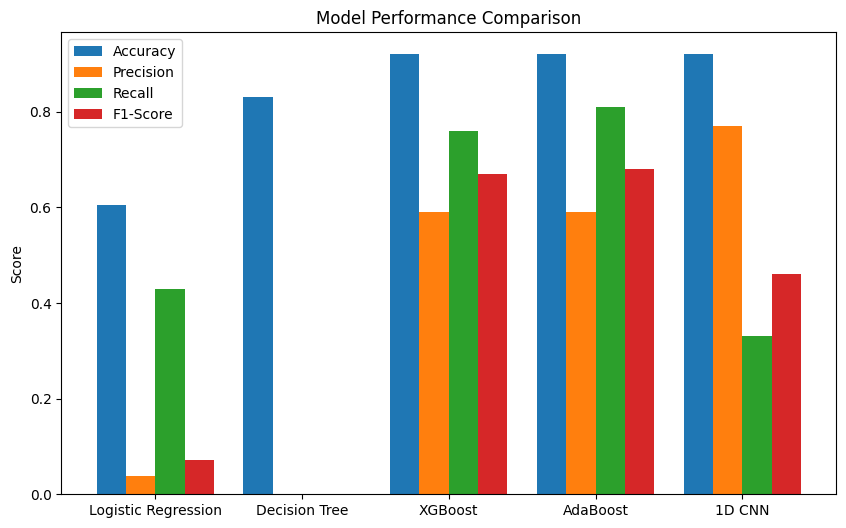

In [ ]:
x = range(len(models))
plt.figure(figsize=(10, 6))
plt.bar(x, accuracy, width=0.2, label='Accuracy', align='center')
plt.bar([i + 0.2 for i in x], precision, width=0.2, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], recall, width=0.2, label='Recall', align='center')
plt.bar([i + 0.6 for i in x], f1_score, width=0.2, label='F1-Score', align='center')
plt.xticks([i + 0.3 for i in x], models)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()